# 07-10 Keras Subclassing API ( 케라스 서브클래싱 API)


출처: https://wikidocs.net/106897


케라스의 구현 방식에는 Sequential API, Functional API 외에도 Subclassing API라는 구현 방식이 존재합니다.

1. 서브클래싱 API로 구현한 선형 회귀


In [1]:
import tensorflow as tf


In [2]:
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

In [3]:
model = LinearRegression()


In [4]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

클래스(class) 형태의 모델은 tf.keras.Model을 상속받습니다. 그리고 init()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. super() 함수를 부르면 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화 됩니다. call() 함수는 모델이 데이터를 입력받아 예측값을 리턴하는 포워드(forward) 연산을 진행시키는 함수입니다.

## 2. 언제 서브클래싱 API를 써야 할까?


Sequential API는 간단한 모델을 구현하기에 적합합니다. 

Functional API로는 Sequential API로 구현할 수 없는 복잡한 모델들을 구현가능합니다. 

그런데 Subclassing API로는 Functional API가 구현할 수 없는 모델들조차 구현할 수 있는 경우가 있습니다. 

Functional API는 기본적으로 딥 러닝 모델을 DAG(directed acyclic graph)로 취급합니다. 

실제로 대부분의 딥 러닝 모델이 이에 속하기는 하지만, 항상 그렇지는 않습니다. 

예를 들어서 재귀 네트워크나 트리 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없습니다.

이를 반대로 해석하면 대부분의 딥 러닝 모델은 Functional API 수준에서도 전부 구현이 가능하다는 의미이기도 합니다. 

그래서 Subclassing API는 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합합니다.


## 3. 세 가지 구현 방식 비교.

1) Sequential API
장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다.
단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 이런 모델들의 구현은 Functional API를 사용해야 합니다.

2) Functional API
장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.
단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다. 가령, 아래의 코드를 봅시다.

3) Subclassing API
장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.
단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.

In [6]:
from IPython.display import Image


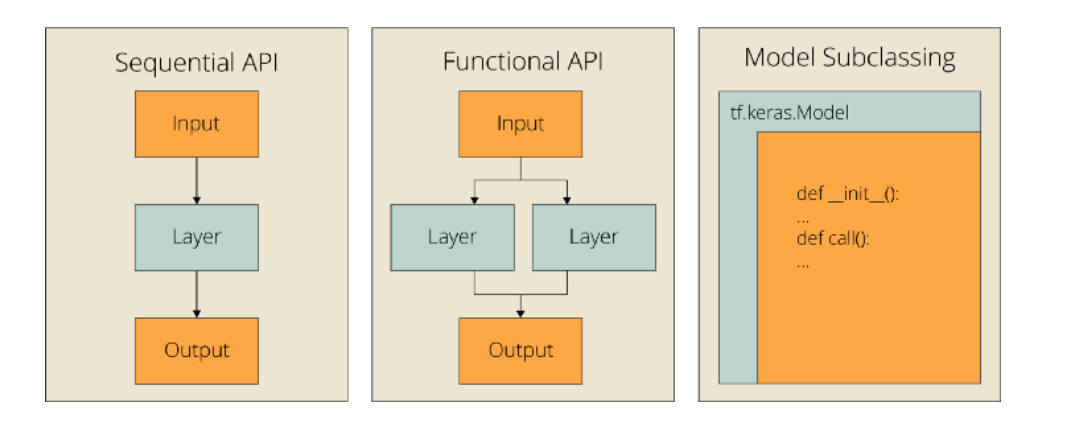

In [7]:
Image("image/07-10-1 Keras Subclassing API.png")